# Only focus on VIP network (Top 10 alters network)

In [1]:
import numpy as np
import pandas as pd
import meetup_strategy as ms
import time 
import util
import pickle
%load_ext autoreload
%autoreload 2

In [2]:
checkin_path = 'data/gowalla_checkins.csv'
placeid_path = 'temp_data/gws-150/gowalla_placeidT_150.pickle'
friendship_path = 'data/gowalla_friends.csv'
VIP_network_path = 'final/gws-150/gws_VIP_MeetupNp.csv'

In [3]:
VIP_network = pd.read_csv(VIP_network_path)

In [4]:
# read picle file
pickle_in = open(placeid_path, "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [11]:
VIP_H_MFN = VIP_network[VIP_network['category'] == 'CB-1H-MFN'][['userid', 'userid_y']]

## H-MFN

In [12]:
VIP_H_MFN.columns = ['userid_x', 'userid_y']
VIP_H_MFN['userid_x'] = VIP_H_MFN['userid_x'].astype(int)
VIP_H_MFN['userid_y'] = VIP_H_MFN['userid_y'].astype(int)

In [13]:
VIP_H_MFN

,userid_x,userid_y
0,0,267
1,0,66
2,0,547
3,0,256
4,0,515
...,...,...
1415,10962,87281
1416,10962,33735
1417,10962,139339
1418,10962,56768


In [14]:
ValidGoodMeetupCV = ms.MeetupCrossValid(checkin_path, mins_records=150, name='gws_H_cv_vip10',freq='H',
                            n_previous=None, user_meetup=None, total_meetup=VIP_H_MFN, placeidT=placeidT)

In [15]:
len(ValidGoodMeetupCV.egolist)

142

In [ ]:
ValidGoodMeetupCV.ego_info(n_shown=False, verbose=True, filesave=True)

0
41
52
66
88
89
98
107


## TFN

In [11]:
VIP_TFN.columns = ['userid_x', 'userid_y']
VIP_TFN['userid_x'] = VIP_TFN['userid_x'].astype(int)
VIP_TFN['userid_y'] = VIP_TFN['userid_y'].astype(int)

In [12]:
TFN_vip_meetup = ms.MeetupCrossValid(checkin_path, mins_records=150, name='gws_TFN_vip10',freq='H',
                            n_previous=None, user_meetup=None, total_meetup=VIP_TFN, placeidT=placeidT)

In [13]:
len(TFN_vip_meetup.egolist)

145

In [14]:
TFN_vip_meetup.ego_info(n_shown=False, verbose=True, filesave=True)

0
41
52
66
88
89
98
107
112
116
124
125
135
138
141
148
156
172
203
204
211
233
256
267
282
313
327
334
335
337
350
363
375
376
401
416
428
434
436
445
456
459
460
476
486
490
494
510
511
515
521
531
533
535
547
557
559
573
577
578
584
859
914
956
1108
1174
1405
1432
1999
2241
2255
2810
3018
3070
3229
3426
3574
3675
3703
3756
3817
3870
3888
4078
4103
4141
4151
4216
4368
4370
4390
4467
4517
4535
4585
4617
4627
4633
4636
4676
4678
4690
4730
4743
4781
4804
4867
4879
4937
4989
5235
5236
5237
5243
5438
5576
5663
5670
5677
5692
5717
5734
5736
5764
5812
5970
6035
6116
6122
6139
6150
6155
6156
6248
6257
6296
8091
10107
10681
10683
10812
10832
10837
10962
10971


,Included,alters_names,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,Pi_alters_ratio,Pi_ego_alters_ratio,userid
0,1,'257',5.551141,4.935937,0.346086,0.441586,0.900513,1.149004,0
1,1,'19',6.034623,5.097940,0.263775,0.417246,0.686340,1.085672,0
2,1,'88',6.147205,5.140646,0.243335,0.410741,0.633156,1.068746,0
3,1,'557',6.255681,5.157705,0.223053,0.408131,0.580382,1.061956,0
4,1,'547',6.300223,5.276130,0.214536,0.389842,0.558221,1.014366,0
...,...,...,...,...,...,...,...,...,...
1018,9,"'10066','10950','10117','54963','25028','25024...",6.839218,6.708959,0.426669,0.439928,1.052095,1.084788,10971
1019,9,"'10066','10950','10869','54963','25028','25024...",6.766509,6.675511,0.434083,0.443315,1.070376,1.093142,10971
1020,9,"'10066','10117','10869','54963','25028','25024...",6.825001,6.687089,0.428121,0.442143,1.055676,1.090252,10971
1021,9,"'10950','10117','10869','54963','25028','25024...",6.886504,6.706455,0.421830,0.440181,1.040163,1.085415,10971


# Compare and visualisation

In [15]:
TFN_vip = TFN_vip_meetup.cross_info.copy()
H_MFN_vip = ValidGoodMeetupCV.cross_info.copy()

In [20]:
TFN_vip['category'] = 'TFN'
H_MFN_vip['category'] = 'CB-1H-MFN'

In [17]:
import visualization as vs

In [21]:
vip_meetup = pd.concat([H_MFN_vip, TFN_vip])

In [22]:
vip_meetup.to_csv('final/gws-150-cv/gws_join_vip10_CV.csv', index=False)

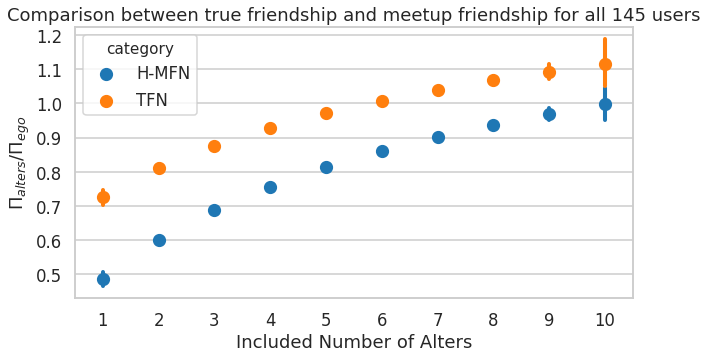

In [19]:
vs.cv_compare_plot(vip_meetup, threshold=10, mode='talk', l=10, w=5)